# Getting the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/new) to get your own .csv file

```SQL
WITH MonthlyData AS (
    SELECT 
        dateadd(month, datediff(month, 0, q.CreationDate), 0) AS MonthStart,
        t.TagName
    FROM PostTags pt
    JOIN Posts q ON q.Id = pt.PostId
    JOIN Tags t ON t.Id = pt.TagId
    WHERE t.TagName IN (
        'java','c','c++','python','c#','javascript','assembly','php',
        'perl','ruby','visual-basic','vb.net','swift','r','objective-c',
        'scratch','go','delphi'
    )
    AND q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
)
SELECT 
    MonthStart, 
    TagName, 
    COUNT(*) AS PostCount
FROM MonthlyData
GROUP BY MonthStart, TagName
ORDER BY MonthStart ASC, PostCount DESC;

---
# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


# Data Exploration

In [2]:
languages = pd.read_csv("QueryResults_StackOverflow.csv").dropna(how='any')
languages.columns = ['Date', 'language_name', 'PostCount']
languages.head()

,Date,language_name,PostCount
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,c#,503
2,2008-08-01 00:00:00,java,220
3,2008-08-01 00:00:00,c++,164
4,2008-08-01 00:00:00,javascript,160


In [3]:
languages.tail()

,Date,language_name,PostCount
3330,2026-01-01 00:00:00,assembly,19
3331,2026-01-01 00:00:00,vb.net,13
3332,2026-01-01 00:00:00,ruby,7
3333,2026-01-01 00:00:00,perl,4
3334,2026-01-01 00:00:00,objective-c,2


Checking how many rows and how many columns there are, and 
what are the dimensions of the dataframe?

In [4]:
languages.info

<bound method DataFrame.info of                      Date language_name  PostCount
0     2008-07-01 00:00:00            c#          3
1     2008-08-01 00:00:00            c#        503
2     2008-08-01 00:00:00          java        220
3     2008-08-01 00:00:00           c++        164
4     2008-08-01 00:00:00    javascript        160
...                   ...           ...        ...
3330  2026-01-01 00:00:00      assembly         19
3331  2026-01-01 00:00:00        vb.net         13
3332  2026-01-01 00:00:00          ruby          7
3333  2026-01-01 00:00:00          perl          4
3334  2026-01-01 00:00:00   objective-c          2

[3335 rows x 3 columns]>

In [5]:
languages.shape

(3335, 3)

Counting the number of entries in each column of the dataframe

In [6]:
languages.count()

Date             3335
language_name    3335
PostCount        3335
dtype: int64

Calculate the ***total number of post per language***.
Which Programming language has had the ***highest total number of posts*** of all time?

In [7]:
total_posts = languages[['language_name', 'PostCount']] .groupby('language_name')
total_posts

In [8]:
# total number of posts per languages
total_posts = total_posts.sum()  
total_posts 

,PostCount
language_name,
assembly,45187
c,408253
c#,1623283
c++,814787
delphi,52556
go,74482
java,1917068
javascript,2525453
objective-c,291874


In [9]:
total_posts['Rank'] = total_posts.rank(ascending=False)
total_posts.sort_values(by='Rank')

,PostCount,Rank
language_name,,
javascript,2525453,1.0
python,2208049,2.0
java,1917068,3.0
c#,1623283,4.0
php,1463855,5.0
c++,814787,6.0
r,510716,7.0
c,408253,8.0
swift,336238,9.0


In [10]:
# Javascript is the language with the highest number of posts of all time 
maxnumber_posts = total_posts['PostCount'].max()
total_posts[total_posts['PostCount'] == maxnumber_posts]

,PostCount,Rank
language_name,,
javascript,2525453,1.0


In [11]:
total_posts.count()

PostCount    16
Rank         16
dtype: int64

In [12]:
total_posts.size

32

In [13]:
len(total_posts)

16

**Note**: Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many ***months*** of data exist per language? Which language had the ***fewest months*** with an entry?


In [14]:
total_posts_dates = languages.groupby('language_name' ).count()
total_posts_dates

,Date,PostCount
language_name,,
assembly,210,210
c,210,210
c#,211,211
c++,210,210
delphi,210,210
go,195,195
java,210,210
javascript,210,210
objective-c,210,210


In [15]:
fewest_months = total_posts_dates['Date'].min()
total_posts_dates[total_posts_dates['Date'] == fewest_months]

,Date,PostCount
language_name,,
go,195,195


---
# Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [16]:
pd.to_datetime(languages['Date'])

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
3330   2026-01-01
3331   2026-01-01
3332   2026-01-01
3333   2026-01-01
3334   2026-01-01
Name: Date, Length: 3335, dtype: datetime64[ns]

In [17]:
languages['Date'] = pd.to_datetime(languages['Date'])
languages.head()

,Date,language_name,PostCount
0,2008-07-01,c#,3
1,2008-08-01,c#,503
2,2008-08-01,java,220
3,2008-08-01,c++,164
4,2008-08-01,javascript,160


---
# Data Manipulation



In [18]:
reshaped_languages = languages.pivot(index='Date', columns='language_name', values='PostCount')
reshaped_languages.tail()

language_name,assembly,c,c#,c++,delphi,go,java,javascript,objective-c,perl,php,python,r,ruby,swift,vb.net
Date,,,,,,,,,,,,,,,,
2025-09-01,22.0,124.0,284.0,248.0,22.0,34.0,294.0,287.0,11.0,9.0,110.0,680.0,149.0,13.0,122.0,20.0
2025-10-01,41.0,120.0,284.0,231.0,22.0,32.0,261.0,261.0,8.0,7.0,92.0,645.0,182.0,10.0,129.0,7.0
2025-11-01,17.0,105.0,249.0,209.0,14.0,29.0,241.0,214.0,4.0,2.0,78.0,537.0,129.0,9.0,104.0,8.0
2025-12-01,19.0,67.0,192.0,152.0,16.0,21.0,189.0,151.0,2.0,6.0,55.0,413.0,98.0,6.0,88.0,6.0
2026-01-01,19.0,88.0,175.0,172.0,22.0,28.0,189.0,213.0,2.0,4.0,56.0,445.0,85.0,7.0,73.0,13.0


In [19]:
reshaped_languages.shape

(211, 16)

Counting the number of entries per programming language. to see if the number of entries might be different? 

In [20]:
reshaped_languages.count()

language_name
assembly       210
c              210
c#             211
c++            210
delphi         210
go             195
java           210
javascript     210
objective-c    210
perl           210
php            210
python         210
r              208
ruby           210
swift          201
vb.net         210
dtype: int64

In [21]:
total_posts_dates # just to chechk the the number of enteries per programing languages is the same, Pandas doesn't count NAN values.

,Date,PostCount
language_name,,
assembly,210,210
c,210,210
c#,211,211
c++,210,210
delphi,210,210
go,195,195
java,210,210
javascript,210,210
objective-c,210,210


In [22]:
total_posts_dates['PostCount'].values == reshaped_languages.count().values #Just to compare the number of enteries 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

---
# Data Visualisaton with with Matplotlib


#### Recomended Ratios for Chart Size by type
Ratios between Width and Lenght:
* **Line/Area Charts:** Benefit from wider formats (16:9 or golden ratio 1.618:1) to show progression over time.
* **Bar/Column Charts:** Generally follow the 1.4–1.8 ratio, but vertical bar charts can be narrower if few groups are present.
* **Horizontal Bar Charts:** Can sometimes be higher than they are wide, depending on the number of categories.
  
Why Aspect Ratio Matters ?
* **Avoiding Misinterpretation:** Using an incorrect ratio can visually manipulate the data, making trends look more or less dramatic than they actually are.
* **Slope Perception:** A wider chart makes trends appear flatter, while a narrower chart accentuates fluctuations.
### Ploting Java

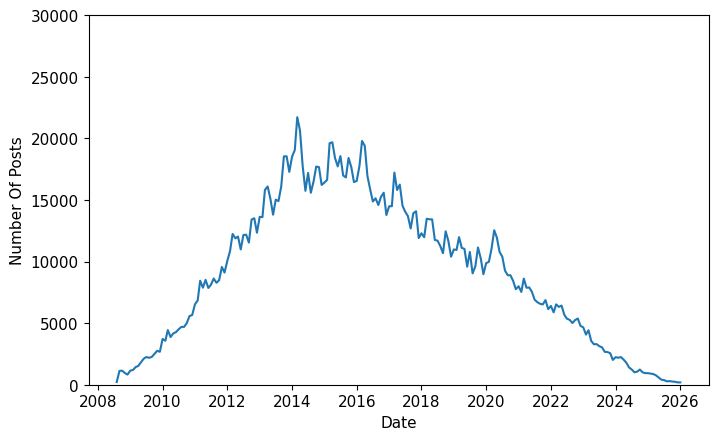

In [35]:
plt.figure(figsize=(8, 4.8))           # for line are Charts 1.6-1.7 ratio
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
plt.plot(reshaped_languages.index, reshaped_languages['java'])

### Comparing Java with Python

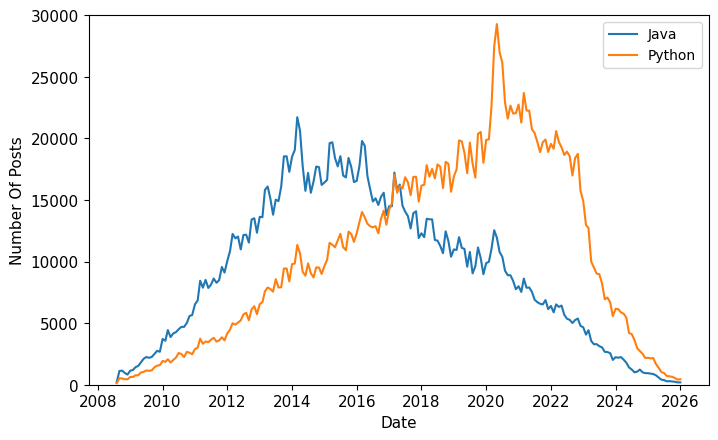

In [24]:
plt.figure(figsize=(8, 4.8))           
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
plt.plot(reshaped_languages.index, reshaped_languages['java'], label='Java')
plt.plot(reshaped_languages.index, reshaped_languages['python'], label='Python')
plt.legend()


### Comparing JavaScript with Python

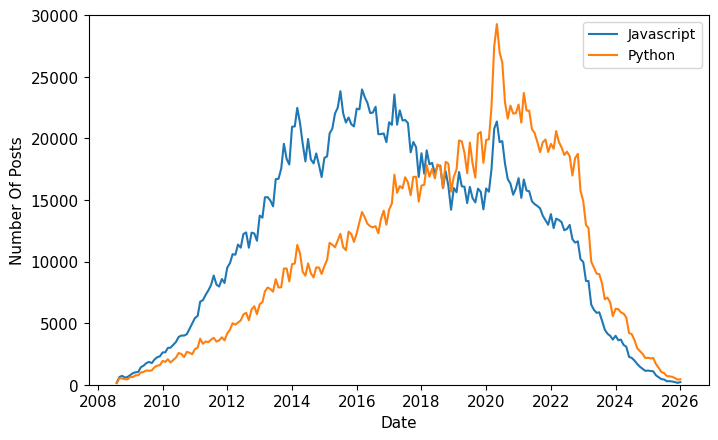

In [36]:
plt.figure(figsize=(8, 4.8))           
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
plt.plot(reshaped_languages.index, reshaped_languages['javascript'], label='Javascript')
plt.plot(reshaped_languages.index, reshaped_languages['python'], label='Python')
plt.legend()

**This graph tells a differrent story** although **Javascript** is the most popular by winning the total number of posts on stack overflow from 2008 to 2026 but if we look only from 2018 till 2026 i think it will show that **Python** is winning the popularity game for the **last 8 years** when it comes to the number of posts or tags on stack overflow. 

In [37]:
languages.head()

,Date,language_name,PostCount
0,2008-07-01,c#,3
1,2008-08-01,c#,503
2,2008-08-01,java,220
3,2008-08-01,c++,164
4,2008-08-01,javascript,160


**This to calculate the total number of posts for each language from 2018 onwards**

In [38]:
y2018_onwards = languages[languages['Date'] >= '2018']
y2018_onwards = y2018_onwards[['language_name', 'PostCount']].groupby('language_name').sum()
y2018_onwards['Rank'] = y2018_onwards.rank(ascending=False)
y2018_onwards.sort_values(by='Rank').head()

,PostCount,Rank
language_name,,
python,1365112,1.0
javascript,1045169,2.0
java,608953,3.0
c#,489183,4.0
php,359180,5.0


As expected **Python** is on the winning the popularity game on stack overflow for the last 8 years!

### Comparing Python and JavaScript from 2018 onwards

In [39]:
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2026, 1, 1)

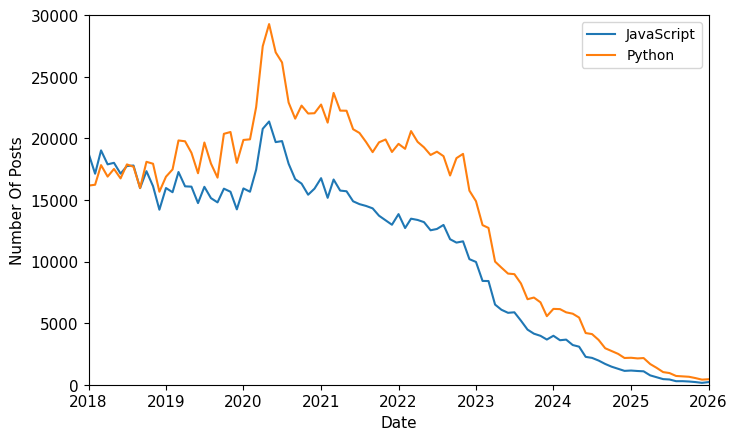

In [42]:
plt.figure(figsize=(8, 4.8))           
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
plt.xlim(start_date, end_date)   #zooming in 
plt.plot(reshaped_languages.index, reshaped_languages['javascript'], label='JavaScript')
plt.plot(reshaped_languages.index, reshaped_languages['python'], label='Python')
plt.legend()

This shows the importance of ***visualizaion tools***, but what is most important is the ***brain/brains*** interpreting these graphs and numbers.
For example our data gives the number of Tags or posts based on that we are calculating the popularity of the languages. 

**BUT WHAT IF MOSTS OF THESE POSTS ARE PEOPLE COMPLAINING ABOUT THOSE LANGUAGES for example, it will change the story !**



---
### Matplotlib Application Interfaces (APIs) or "Object-Oriented" Interface

**Note**: I discovered this because when i was plotting the 16 languages i wasn't happy with the standard 10 colors that Matplotlib repeated line colors. then i learned about colormaps, Matplotlib color cycle, then I came accross subplots and API so i used the tutorial in the documentation to learn about Matplotlib Axes

[Documentation tutorial Axes vs Pyplot](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html)

[Documentation Matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html)

[Documentation Matplotlib.Axes](https://matplotlib.org/stable/api/axes_api.html)

In [30]:
# Sets the color cycle to the 'tab20' palette (20 unique colors)
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

In [31]:
#plt.rcdefaults() #this resets the color defaults 

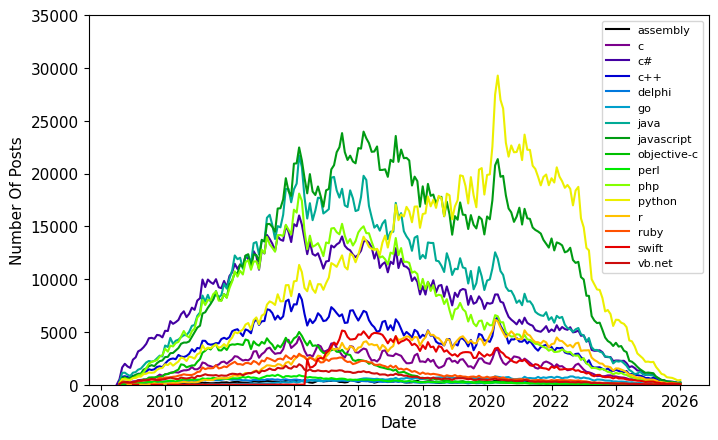

In [32]:
# Choosing a high-contrast colormap
# 'nipy_spectral' is very distinct. 'turbo' is a smoother rainbow.
colormap = plt.cm.nipy_spectral 

# Generating 16 unique colors from that map
n_lines = len(reshaped_languages.columns)
colors = colormap(np.linspace(0, 0.95, n_lines)) # 0.95 avoids getting too close to pure white

# Create the "Canvas" (The Axis Object) 
#fig= The Window/Paper (The big picture) 
# ax=The Graph/Drawing(The data details)
fig, ax = plt.subplots(figsize=(8, 4.8))                                       #plt.figure(figsize=(8, 4.8))

# Apply custom colors to this specific canvas
ax.set_prop_cycle(plt.cycler(color=colors))


ax.set_xlabel('Date', fontsize=11)                                             #plt.xlabel('Date', fontsize=11)
ax.set_ylabel('Number Of Posts', fontsize=11)                                  #plt.ylabel('Number Of Posts', fontsize=11)
ax.tick_params(axis='both', labelsize=11)                                      #plt.xticks(fontsize=11)
                                                                               #plt.yticks(fontsize=11)    
ax.set_ylim(0, 35000)                                                          #plt.ylim(0, 35000)

for column in reshaped_languages.columns:
    ax.plot(reshaped_languages.index, reshaped_languages[column], label=reshaped_languages[column].name)
ax.legend(fontsize=8)



---
# Smoothing out Time Series Data

To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. [pandas documentation rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) 

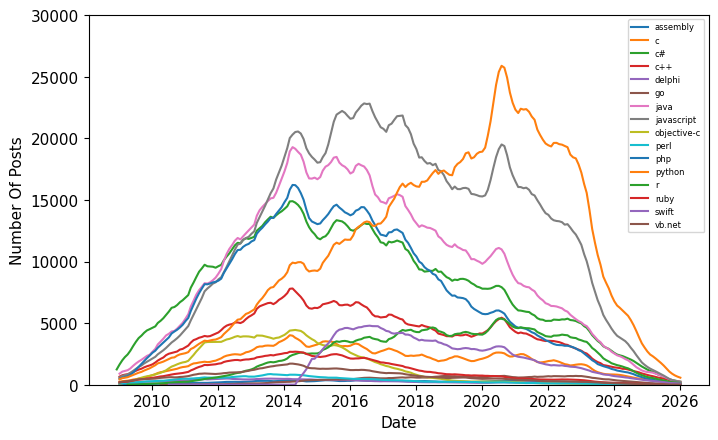

In [44]:
rolled_df = reshaped_languages.rolling(window=6).mean()

plt.figure(figsize=(8, 4.8))           
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
for column in reshaped_languages.columns:
    plt.plot(rolled_df.index, rolled_df[column], label=rolled_df[column].name)
plt.legend(fontsize=6)

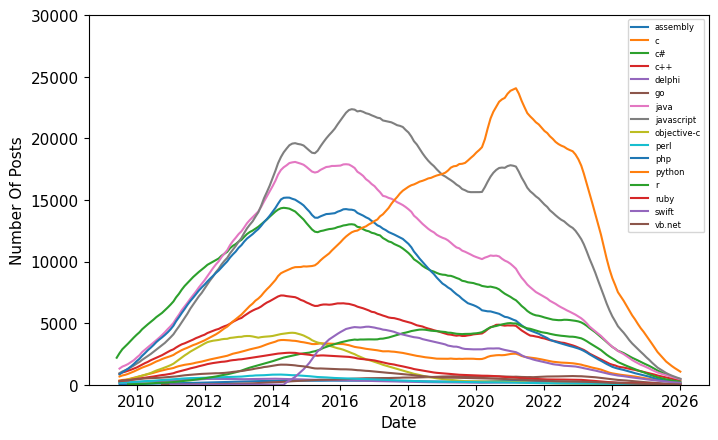

In [45]:
rolled_df = reshaped_languages.rolling(window=12).mean()

plt.figure(figsize=(8, 4.8))           
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number Of Posts', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 30000)
for column in reshaped_languages.columns:
    plt.plot(rolled_df.index, rolled_df[column], label=rolled_df[column].name)
plt.legend(fontsize=6)